In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

df = pd.read_csv('/home/ding/coding/DAND/investigate_dataset_project/movies_dataset/tmdb-movies.csv', engine='python')
df.head(2)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [2]:
print(df.info())
df.shape
# print(type(df['cast'][1]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

(10866, 21)

To do:
release date to date-time format
separate rows by genre, production companies, cast
find number of unique values
find number of null values
find number of duplicates
decide which columns to drop



In [3]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

10 more unique ID values than there are unique imdb id values because of Null values in imdb id column

In [4]:
dupes = df.duplicated()
df.query('@dupes == True')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [5]:
df.drop_duplicates(inplace=True)
df.shape

(10865, 21)

In [6]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Columns to be dropped include: homepage, tagline, imdb_id.

In [7]:
drop_columns = ['homepage', 'tagline', 'imdb_id']
df.drop(labels=drop_columns, axis=1, inplace=True)
df.shape

(10865, 18)

In [8]:
df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [9]:
# df2 = pd.read_csv('/home/ding/coding/DAND/investigate_dataset_project/movies_dataset/tmdb_5000_movies.csv')
# df2.head()
# df2.shape
# df2.info()

In [10]:
df_cast = df.copy()
df_cast.cast = df_cast.cast.astype(str)

In [11]:
# df.cast.split('|')
# df_cast = df.copy()
# lst = df_cast.cast.apply(lambda x: x.split('|'))
# lst[1][1]
# lst = df_cast['cast'][i].apply(lambda x: x.split('|'))

In [12]:
# assess revenue over time
df.head(1)
year_group = df.groupby('release_year')['revenue'].mean()
# df['mav_rev'] = df.groupby('release_year')['revenue'].rolling(5).mean()
# df['mav_rev'] = year_group.rolling(window=5)
mv_av = year_group.rolling(5).mean()
mv_av.dropna(inplace=True)

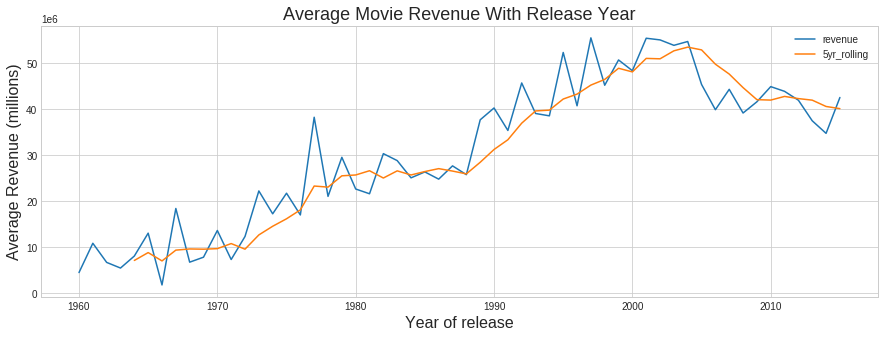

In [13]:
fig = plt.subplots(1,3, figsize=(15,5), sharex=True)
ax = plt.axes()
plt.plot(year_group);
plt.plot(mv_av)
plt.title("Average Movie Revenue With Release Year", fontsize=18)
plt.xlabel("Year of release", fontsize=16)
plt.ylabel("Average Revenue (millions)", fontsize=16)
ax.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
leg_labels = ['revenue', '5yr_rolling']
plt.legend(leg_labels);

Why has the average revenue dropped?
Assess movie count
Assess movie budgets

In [14]:
counts = df.groupby('release_year')['revenue'].count()
av_budg = df.groupby('release_year')['budget'].mean()
# budget0 = df.groupby('release_year').count()

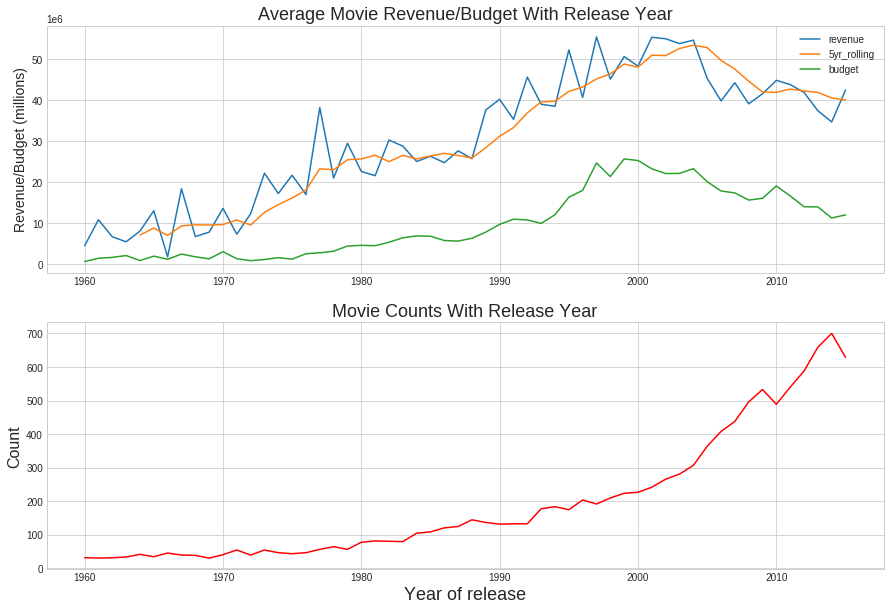

In [15]:
fig = plt.subplots(1,3, figsize=(15,10), sharex=True)
# plt.subplots_adjust(hspace=0.3)

plt.figure(1)
plt.subplot(211)
plt.plot(year_group)
plt.plot(mv_av)
plt.plot(av_budg)
plt.title("Average Movie Revenue/Budget With Release Year", fontsize=18)
# plt.xlabel("Year of release", fontsize=14)
plt.ylabel("Revenue/Budget (millions)", fontsize=14)
plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
leg_labels = ['revenue', '5yr_rolling', 'budget']
plt.legend(leg_labels, loc=0);

# plt.figure(1)
# plt.subplot(312)
# plt.plot(av_budg)
# plt.title("Average Movie Budget With Release Year", fontsize=18)
# plt.xlabel("Year of release", fontsize=16)
# plt.ylabel("Average Budget (millions)", fontsize=16)
# plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6))

plt.figure(1)
plt.subplot(212)
plt.plot(counts, 'r')
# plt.plot(budget0, 'b')
plt.title("Movie Counts With Release Year", fontsize=18)
plt.xlabel("Year of release", fontsize=18)
plt.ylabel("Count", fontsize=16)
# leg_labels2 = ['Total Movie Count', 'With Zero Budget',]
# plt.legend(leg_labels2, loc=0)

plt.show()

**Initial Deductions**
Average revenue rises and peaks around 2005 where there is a sharp drop in revenues. This coincides very closely with a sharp rise in the number of movies being produced each year as well as a reduction in the average movie budgets. There is a strong correlation between the average movie budget and average revenues.
**However** from further analysis of the data, we see that there are 7011 rows where the values for budget and/or revenue are zero. It is likely that these zero values actually represent null values, therefore, for sensible analysis of the relationships of revenue and budget over time these values are removed and the analysis is repeated.

We can from the figure below that these zero values are likely skewing the data and responsible for the reduction in average movie revenue and budget we have seen previously.

In [16]:
budget0 = df.query('budget == 0')
budget0.shape
df.shape
rev0 = df.query('revenue == 0')
rev0.shape
br_0 = df.query('budget == 0 or revenue == 0')
br_0.shape
# 5696 rows have 0 for the budget. Will remove these rows and repeat revenue analysis

(7011, 18)

Text(0.5, 1.0, 'Count of movies with zero budget or revenue')

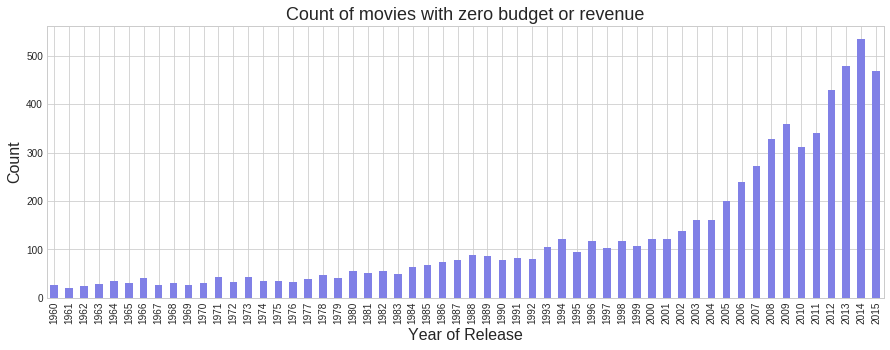

In [17]:
budget0.groupby('release_year').count()['id']
locs = budget0.groupby('release_year')['release_year']
heights = br_0.groupby('release_year').count()['id']
# plt.bar(locs, height=heights)
heights.plot(kind='bar', figsize=(15,5), color=(0.5,0.5,0.9));
plt.xlabel('Year of Release', fontsize=(16))
plt.ylabel('Count', fontsize=(16))
plt.title("Count of movies with zero budget or revenue", fontsize=(18))

In [18]:
df_clean = df.query('budget != 0 and revenue != 0')
df_clean.describe()
rev_year = df_clean.groupby('release_year')['revenue'].mean()
mv_av = rev_year.rolling(5).mean()
mv_av.dropna(inplace=True)
counts = df_clean.groupby('release_year')['revenue'].count()
av_budg = df_clean.groupby('release_year')['budget'].mean()



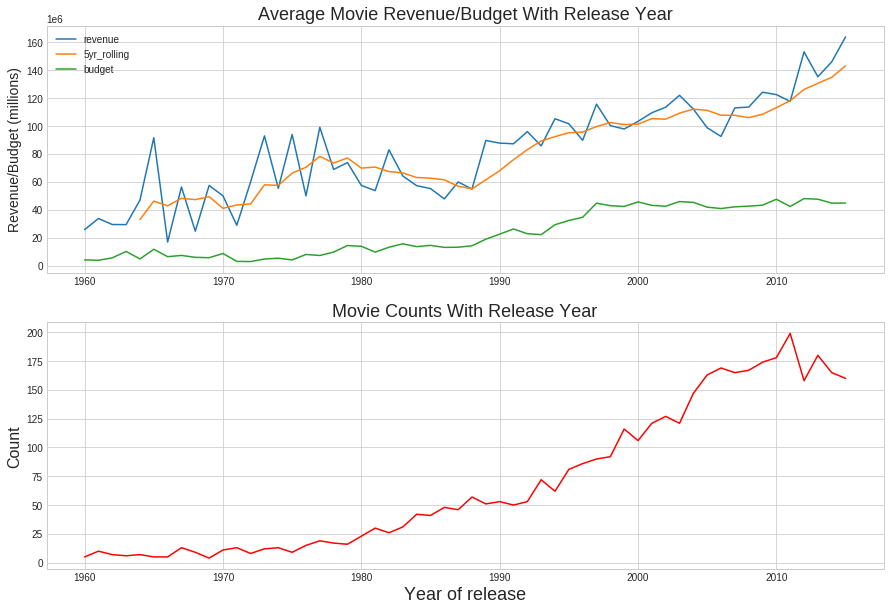

In [19]:
fig = plt.subplots(1,3, figsize=(15,10), sharex=True)
# plt.subplots_adjust(hspace=0.3)

plt.figure(1)
plt.subplot(211)
plt.plot(rev_year)
plt.plot(mv_av)
plt.plot(av_budg)
plt.title("Average Movie Revenue/Budget With Release Year", fontsize=18)
# plt.xlabel("Year of release", fontsize=14)
plt.ylabel("Revenue/Budget (millions)", fontsize=14)
plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
leg_labels = ['revenue', '5yr_rolling', 'budget']
plt.legend(leg_labels, loc=0);

plt.figure(1)
plt.subplot(212)
plt.plot(counts, 'r')
plt.title("Movie Counts With Release Year", fontsize=18)
plt.xlabel("Year of release", fontsize=18)
plt.ylabel("Count", fontsize=16)



plt.show()

**Deductions**

Now that the zero values for movie budget and revenue has been removed we see a very different trend in the data. We no longer see the average movie revenue and budget fall from 2005, instead we see the average budget remain stable around 45million and the average revenues rise by around 30million. 

There is a strong correlation between the average movie budget and average revenues. **Do we see this if we plot the adjusted movie budgets and revenues directly?**

In [20]:
rev_year_adj = df_clean.groupby('release_year')['revenue_adj'].mean()
mv_av_adj = rev_year_adj.rolling(5).mean()
mv_av_adj.dropna(inplace=True)
counts = df_clean.groupby('release_year')['revenue_adj'].count()
av_budg_adj = df_clean.groupby('release_year')['budget_adj'].mean()

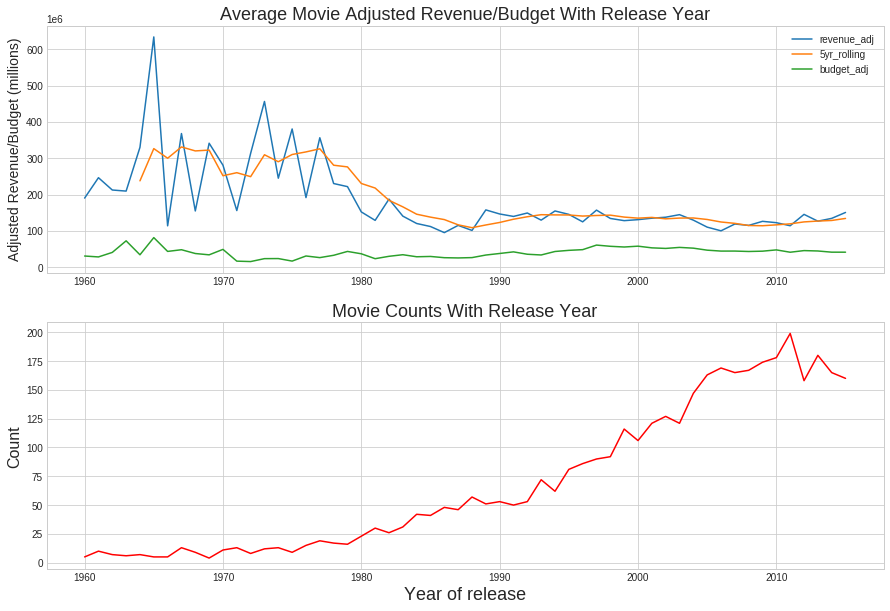

In [190]:
fig = plt.subplots(1,3, figsize=(15,10), sharex=True)
# plt.subplots_adjust(hspace=0.3)

plt.figure(1)
plt.subplot(211)
plt.plot(rev_year_adj)
plt.plot(mv_av_adj)
plt.plot(av_budg_adj)
# plt.plot(profit_adj)
plt.title("Average Movie Adjusted Revenue/Budget With Release Year", fontsize=18)
# plt.xlabel("Year of release", fontsize=14)
plt.ylabel("Adjusted Revenue/Budget (millions)", fontsize=14)
plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
leg_labels = ['revenue_adj', '5yr_rolling', 'budget_adj']
plt.legend(leg_labels, loc=0);

plt.figure(1)
plt.subplot(212)
plt.plot(counts, 'r')
plt.title("Movie Counts With Release Year", fontsize=18)
plt.xlabel("Year of release", fontsize=18)
plt.ylabel("Count", fontsize=16)



plt.show()

**Deductions**

When plotting the adjusted average movie revenues and budget over time we see that the adjusted budget has stayed stable over time, and the adjusted revenues have decreased. We can therefore deduce that the average adjusted profits have decreased over time. The major decrease occurred between 1978 and 1988 before stablising around 150million. As the number of movies being released each year increases, the revenue curve becomes much more stable.

There is a strong correlation between the average movie budget and average revenues. To assess this relationship we can separate the budget into two categories, High and Low, and assess the revenues of each. **Do we see this if we plot movie vs budget directly?**

In [147]:
budget = df_clean.budget
revenue = df_clean.revenue
budget.describe() #2.4e7
bins = [0, 24000000, 425000000]
labels = ['Low', 'High']
df_clean['budget_level'] = pd.cut(df_clean.budget, bins, labels=labels)
budg_mean = df_clean.groupby('budget_level')['revenue', 'revenue_adj', 'budget', 'budget_adj'].mean()
budg_mean
budget.describe()


/home/ding/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


count    3.854000e+03
mean     3.720370e+07
std      4.220822e+07
min      1.000000e+00
25%      1.000000e+07
50%      2.400000e+07
75%      5.000000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [39]:
low_budget = df_clean.query('budget_level == "Low"')['budget']
low_rev = df_clean.query('budget_level == "Low"')['revenue']
high_budget = df_clean.query('budget_level == "High"')['budget']
high_rev = df_clean.query('budget_level == "High"')['revenue']


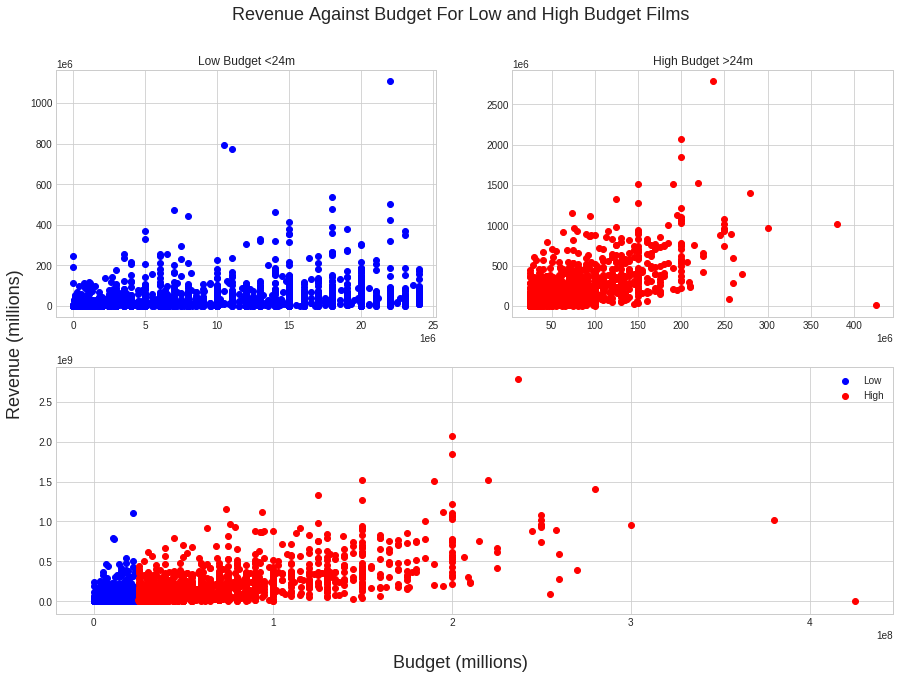

In [182]:
fig, ax = plt.subplots(2,2, figsize=(15,10), sharex=True)

plt.figure(1)
plt.subplot(221)
plt.scatter(x=low_budget, y=low_rev, color='b');
plt.title("Low Budget <24m")
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6))

plt.figure(1)
plt.subplot(222)
plt.scatter(x=high_budget, y=high_rev, color='r');
plt.title("High Budget >24m")
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6))

plt.figure(1)
plt.subplot(212)
plt.scatter(x=low_budget, y=low_rev, color='b');
plt.scatter(x=high_budget, y=high_rev, color='r');
leg_labels = ['Low', 'High']
plt.legend(leg_labels)
# plt.title("Budget against Revenue for low and high budget films")

fig.text(0.5,0.95,'Revenue Against Budget For Low and High Budget Films', ha='center', fontsize=18)
fig.text(0.08,0.5,'Revenue (millions)', va='center', fontsize=18, rotation='vertical')
fig.text(0.5,0.05,'Budget (millions)', ha='center', fontsize=18)

plt.show()

**Deductions**

There is a positive correlation between the size of the budget and the revenue generated. This correlation is more prevalent in the higher budget levels.

In [192]:
df_clean.to_csv('df_clean.csv')
df_new = pd.read_csv('df_clean.csv')

In [260]:
df_new['profit'] = df_new.revenue -  df_new.budget
df_new['profit_adj'] = df_new.revenue_adj -  df_new.budget_adj
pop_dir = df_new.groupby('director').mean()
pop_dir.describe()
count_dir = df_new.groupby('director').count()
count_dir.describe()
count_dir.query('director == "Colin Trevorrow"') #Spielberg has directed the most movies, 27, popularity 1.98.
pop_dir.query('director == "Steven Spielberg"') #Colin Trevorrow most popular director, directing 2 movies.
count_dir.query('id > 5').mean()
director_list5 = count_dir.query('id > 5')
pop_dir5 = pop_dir.query('director in @director_list5.index')
pop_dir5.describe()
pop_dir5.query('popularity > 7') #Christopher Nolan is the most popular director who has directed >5 movies, 7.69
director_list10 = count_dir.query('id > 10')
pop_dir10 = pop_dir.query('director in @director_list10.index')
pop_dir10.query('popularity > 4') #Peter Jackson is the most popular director who has directed >5 movies, 4.38
# df_new.query('popularity > 16')['director']

,Unnamed: 0,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj
director,,,,,,,,,,,,,
Peter Jackson,4593.636364,22753.545455,4.3822,1.205455e+08,5.930222e+08,151.636364,2881.454545,7.145455,2003.727273,1.249415e+08,6.381680e+08,4.724768e+08,5.132265e+08


In [278]:
dir_means = df_new.groupby('director').mean()
max_prof = max(dir_means.profit_adj)
max_prof
dir_means.query('profit_adj == @max_prof') #Irwin Winkler highest average adjusted profit, film: The Net
df_new.query('director == "Irwin Winkler"')
director_list5 = count_dir.query('id > 5')
dir_means5 = dir_means.query('director in @director_list5.index')
max_prof5 = max(dir_means5.profit_adj)
dir_means5.query('profit_adj == @max_prof5') #George Lucas highest average adjusted profit for > 5 films

,Unnamed: 0,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj
director,,,,,,,,,,,,,
George Lucas,5732.0,1194.5,3.910306,6.009233e+07,5.527585e+08,122.5,2116.5,6.7,1987.833333,7.829333e+07,1.052320e+09,4.926661e+08,9.740265e+08
